# Time-Series Analysis

## Data Preparation
1. If there are data from different instances of a metric (Ex: Cpu0, cpu1, cpu2 ...) from a single node, then we will concatenate by taking the average.
2. We just need two columns (timestamp and values).

In [14]:
import os
import pandas as pd

paths_one = []
for path, currentDirectory, files in os.walk("/home/sridhar/DataAnalysis/pod18-node4/"):
    for file in files:
        if file.startswith("percent-idle"):
            #print(file)
            paths_one.append(os.path.join(path, file))

dfs_one = (pd.read_csv(f, index_col=False) for f in paths_one)
concat_one = pd.concat(dfs_one).groupby(level=0).mean()

paths_two = []
for path, currentDirectory, files in os.walk("/home/sridhar/DataAnalysis/pod18-node5/"):
    for file in files:
        if file.startswith("percent-idle"):
            #print(file)
            paths_two.append(os.path.join(path, file))

dfs_two = (pd.read_csv(f, index_col=False) for f in paths_two)
concat_two = pd.concat(dfs_two).groupby(level=0).mean()



In [15]:
syndata_cpu = pd.read_csv('/media/sf_UbuntuShare/syndata/node5/percent-idle.csv')
syndata_cpu.shape[0]

7000

In [16]:
syndata_cpu.head()

,epoch,percent-idle
0,1655651103,8521.868166
1,1655651104,8523.788345
2,1655651105,8525.705702
3,1655651106,8527.626815
4,1655651107,8529.558262


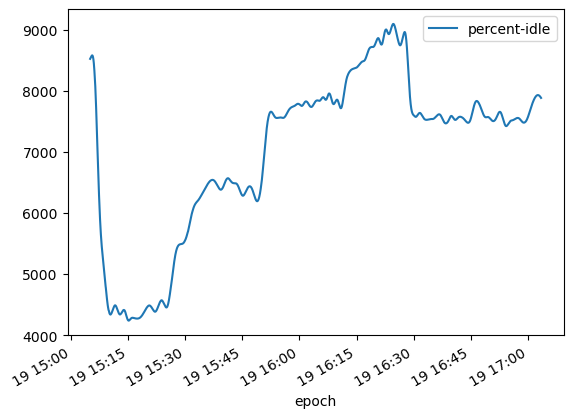

In [17]:
syndata_cpu['epoch'] = pd.to_datetime(syndata_cpu['epoch'],unit='s')
from matplotlib import pyplot
syndata_cpu.plot(x='epoch',y='percent-idle')
pyplot.show()

In [18]:
syndata_cpu.set_index('epoch', inplace=True)
syndata_cpu.index

DatetimeIndex(['2022-06-19 15:05:03', '2022-06-19 15:05:04',
               '2022-06-19 15:05:05', '2022-06-19 15:05:06',
               '2022-06-19 15:05:07', '2022-06-19 15:05:08',
               '2022-06-19 15:05:09', '2022-06-19 15:05:10',
               '2022-06-19 15:05:11', '2022-06-19 15:05:12',
               ...
               '2022-06-19 17:03:17', '2022-06-19 17:03:18',
               '2022-06-19 17:03:19', '2022-06-19 17:03:20',
               '2022-06-19 17:03:21', '2022-06-19 17:03:22',
               '2022-06-19 17:03:23', '2022-06-19 17:03:24',
               '2022-06-19 17:03:25', '2022-06-19 17:03:26'],
              dtype='datetime64[ns]', name='epoch', length=7000, freq=None)

In [19]:
#if concat_one.shape[0] > concat_two.shape[0]:
diff = concat_one.shape[0] - syndata_cpu.shape[0]
concat_one = concat_one.drop(concat_one.index[(concat_one.shape[0] - diff):])
#else:
diff2 = concat_two.shape[0] - syndata_cpu.shape[0]
concat_two = concat_two.drop(concat_two.index[(concat_two.shape[0] - diff2):])

print(concat_one.shape[0])
print(concat_two.shape[0])

7000
7000


In [20]:
# Check if the concatenation is ok.
concat_one.head()
#concat_two.head()

,epoch,value
0,1.655651e+09,95.104537
1,1.655651e+09,94.369582
2,1.655651e+09,94.884779
3,1.655651e+09,95.249049
4,1.655651e+09,95.464521


In [21]:
# Epoch should be converted to datetime.
concat_one['epoch'] = pd.to_datetime(concat_one['epoch'],unit='s')
concat_two['epoch'] = pd.to_datetime(concat_two['epoch'],unit='s')
concat_one['epoch']

0      2022-06-19 15:05:04.041239552
1      2022-06-19 15:05:05.040926976
2      2022-06-19 15:05:06.041322752
3      2022-06-19 15:05:07.040874752
4      2022-06-19 15:05:08.040864768
                    ...             
6995   2022-06-19 17:01:39.040635392
6996   2022-06-19 17:01:40.040791552
6997   2022-06-19 17:01:41.040770816
6998   2022-06-19 17:01:42.040156160
6999   2022-06-19 17:01:43.040583424
Name: epoch, Length: 7000, dtype: datetime64[ns]

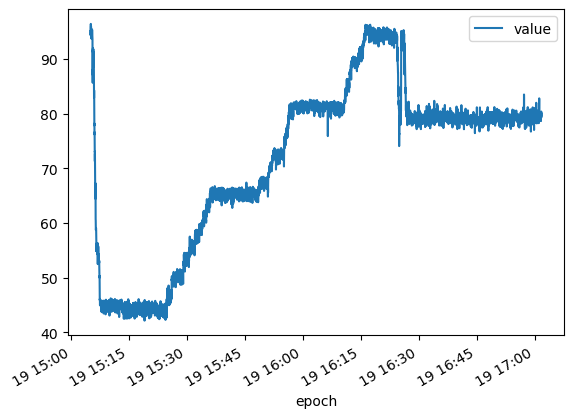

In [22]:
from matplotlib import pyplot
concat_one.plot(x='epoch',y='value')
pyplot.show()

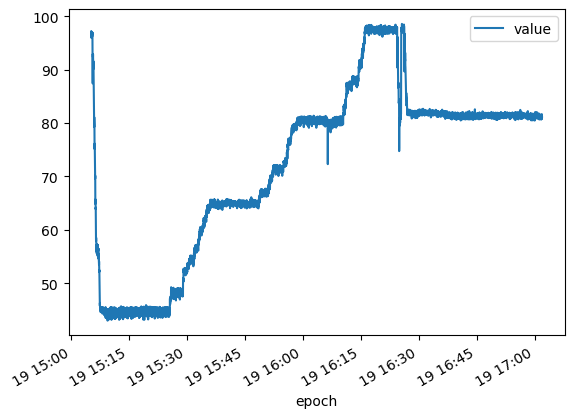

In [23]:
from matplotlib import pyplot
concat_two.plot(x='epoch',y='value')
pyplot.show()

In [24]:
concat_one.set_index('epoch', inplace=True)
concat_two.set_index('epoch', inplace=True)
concat_one.index

DatetimeIndex(['2022-06-19 15:05:04.041239552',
               '2022-06-19 15:05:05.040926976',
               '2022-06-19 15:05:06.041322752',
               '2022-06-19 15:05:07.040874752',
               '2022-06-19 15:05:08.040864768',
               '2022-06-19 15:05:09.040791552',
               '2022-06-19 15:05:10.041239552',
               '2022-06-19 15:05:11.040791552',
               '2022-06-19 15:05:12.040895744',
               '2022-06-19 15:05:13.040229120',
               ...
               '2022-06-19 17:01:34.040937472',
               '2022-06-19 17:01:35.040270848',
               '2022-06-19 17:01:36.040312576',
               '2022-06-19 17:01:37.040708352',
               '2022-06-19 17:01:38.040895744',
               '2022-06-19 17:01:39.040635392',
               '2022-06-19 17:01:40.040791552',
               '2022-06-19 17:01:41.040770816',
               '2022-06-19 17:01:42.040156160',
               '2022-06-19 17:01:43.040583424'],
              dtype=

## Autocorrelation

In [25]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA

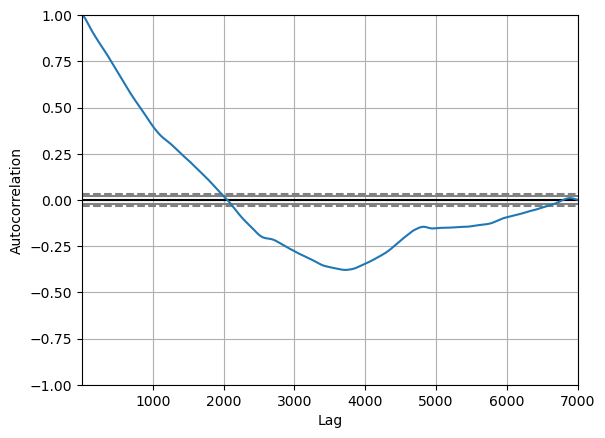

In [26]:
autocorrelation_plot(syndata_cpu)
pyplot.show()

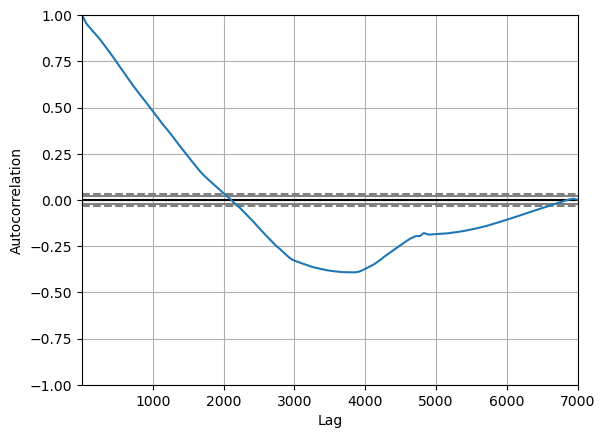

In [27]:
autocorrelation_plot(concat_one)
pyplot.show()

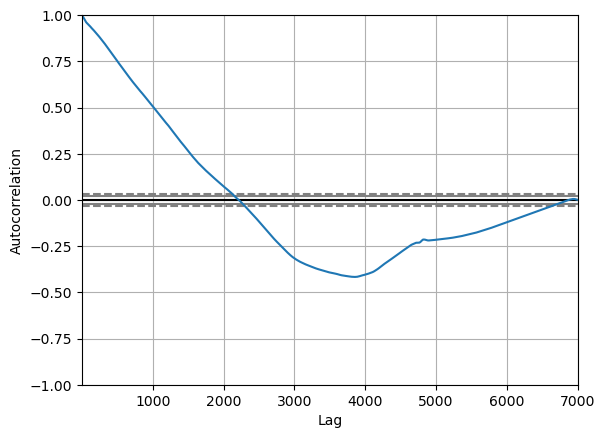

In [28]:
autocorrelation_plot(concat_two)
pyplot.show()

## ARIMA

In [29]:
c1_copy = concat_one.copy(deep=True)
c2_copy = concat_two.copy(deep=True)

In [30]:
syndatacpu = syndata_cpu.copy(deep=True)

In [31]:
syndatacpu.index = syndatacpu.index.to_period('s')

In [32]:
model = ARIMA(syndatacpu, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           percent-idle   No. Observations:                 7000
Model:                 ARIMA(1, 1, 0)   Log Likelihood                6271.213
Date:                Thu, 10 Nov 2022   AIC                         -12538.425
Time:                        08:58:26   BIC                         -12524.718
Sample:                    06-19-2022   HQIC                        -12533.702
                         - 06-19-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998   9.92e-05   1.01e+04      0.000       1.000       1.000
sigma2         0.0097   7.87e-05    123.863      0.000       0.010       0.010
Ljung-Box (L1) (Q):                6989.22   Jarque-

In [33]:
c1_copy.index = c1_copy.index.to_period('s')
c1_copy.index

PeriodIndex(['2022-06-19 15:05:04', '2022-06-19 15:05:05',
             '2022-06-19 15:05:06', '2022-06-19 15:05:07',
             '2022-06-19 15:05:08', '2022-06-19 15:05:09',
             '2022-06-19 15:05:10', '2022-06-19 15:05:11',
             '2022-06-19 15:05:12', '2022-06-19 15:05:13',
             ...
             '2022-06-19 17:01:34', '2022-06-19 17:01:35',
             '2022-06-19 17:01:36', '2022-06-19 17:01:37',
             '2022-06-19 17:01:38', '2022-06-19 17:01:39',
             '2022-06-19 17:01:40', '2022-06-19 17:01:41',
             '2022-06-19 17:01:42', '2022-06-19 17:01:43'],
            dtype='period[S]', name='epoch', length=7000)

In [34]:
#concat_two.index = concat_two.index.to_timestamp(freq='s')
c2_copy.index = c2_copy.index.to_period('s')
c2_copy.index

PeriodIndex(['2022-06-19 15:05:13', '2022-06-19 15:05:14',
             '2022-06-19 15:05:15', '2022-06-19 15:05:16',
             '2022-06-19 15:05:17', '2022-06-19 15:05:18',
             '2022-06-19 15:05:19', '2022-06-19 15:05:20',
             '2022-06-19 15:05:21', '2022-06-19 15:05:22',
             ...
             '2022-06-19 17:01:43', '2022-06-19 17:01:44',
             '2022-06-19 17:01:45', '2022-06-19 17:01:46',
             '2022-06-19 17:01:47', '2022-06-19 17:01:48',
             '2022-06-19 17:01:49', '2022-06-19 17:01:50',
             '2022-06-19 17:01:51', '2022-06-19 17:01:52'],
            dtype='period[S]', name='epoch', length=7000)

In [35]:
model = ARIMA(c2_copy, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                 7000
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -5899.964
Date:                Thu, 10 Nov 2022   AIC                          11803.929
Time:                        08:58:28   BIC                          11817.636
Sample:                    06-19-2022   HQIC                         11808.652
                         - 06-19-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2842      0.003    -85.380      0.000      -0.291      -0.278
sigma2         0.3160      0.001    274.935      0.000       0.314       0.318
Ljung-Box (L1) (Q):                  16.74   Jarque-

In [36]:
model = ARIMA(c1_copy, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                 7000
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -7911.883
Date:                Thu, 10 Nov 2022   AIC                          15827.766
Time:                        08:58:33   BIC                          15841.473
Sample:                    06-19-2022   HQIC                         15832.489
                         - 06-19-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3312      0.007    -47.418      0.000      -0.345      -0.318
sigma2         0.5616      0.005    123.697      0.000       0.553       0.570
Ljung-Box (L1) (Q):                  30.94   Jarque-

## Histograms

array([[<AxesSubplot:title={'center':'value'}>]], dtype=object)

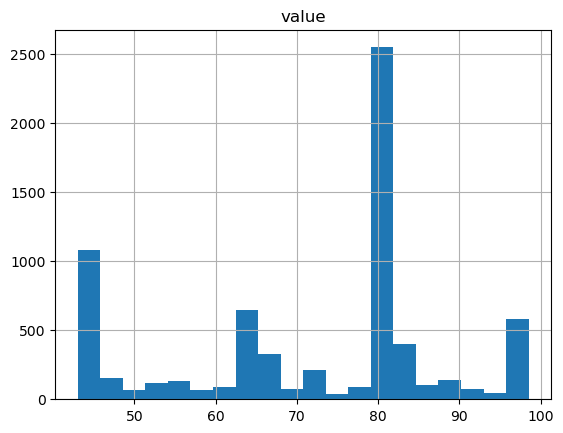

In [37]:
concat_two.hist(column="value", bins=20)

array([[<AxesSubplot:title={'center':'value'}>]], dtype=object)

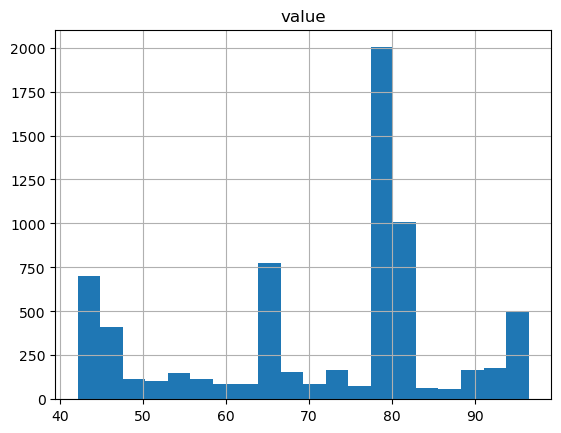

In [38]:
concat_one.hist(column="value", bins=20)

array([[<AxesSubplot:title={'center':'percent-idle'}>]], dtype=object)

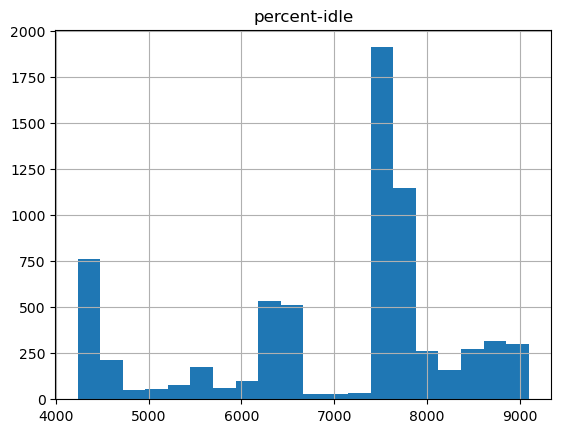

In [40]:
syndata_cpu.hist(column="percent-idle", bins=20)

# Compute Probabilities

<AxesSubplot:>

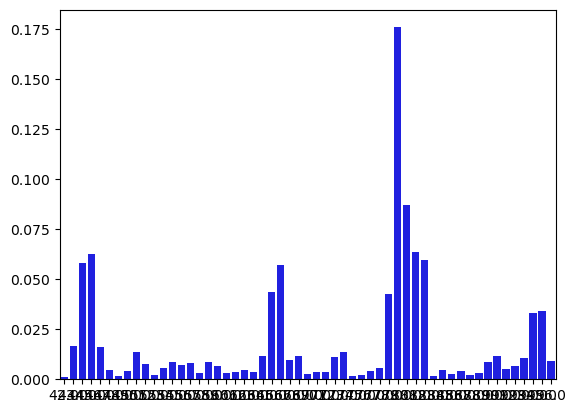

In [41]:
import seaborn as sns
concat_one['value'] = concat_one['value'].round(decimals=0)
probabilities_one = concat_one['value'].value_counts(normalize=True)
sns.barplot(x=probabilities_one.index, y=probabilities_one.values, color='blue')
#probabilities

<AxesSubplot:>

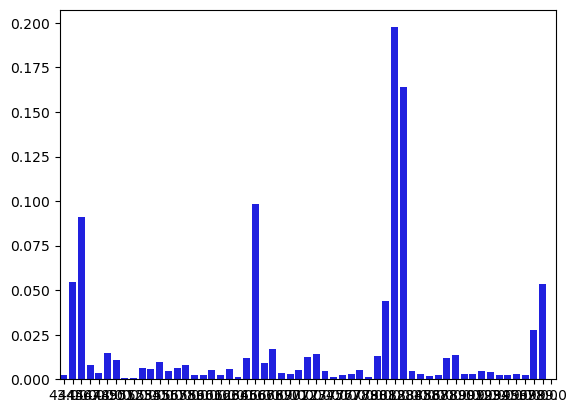

In [42]:
import seaborn as sns
concat_two['value'] = concat_two['value'].round(decimals=0)
probabilities_two = concat_two['value'].value_counts(normalize=True)
sns.barplot(x=probabilities_two.index, y=probabilities_two.values, color='blue')

<AxesSubplot:>

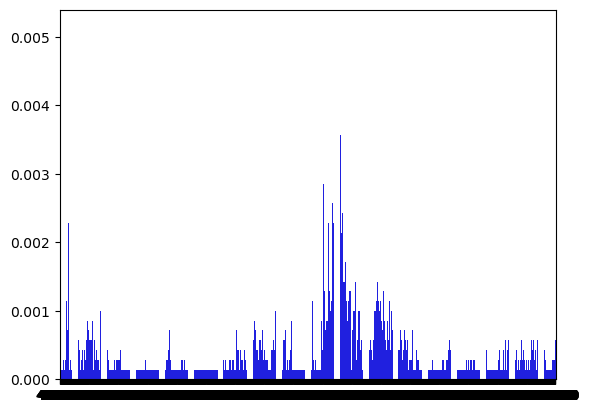

In [43]:
syndata_cpu['percent-idle'] = syndata_cpu['percent-idle'].round(decimals=0)
probabilities_t = syndata_cpu['percent-idle'].value_counts(normalize=True)
sns.barplot(x=probabilities_t.index, y=probabilities_t.values, color='blue')

# Comparative Analysis

## Dynamic Time Warping

## Interpretation
Dynamic time warping is a seminal time series comparison technique.The objective of time series comparison methods is to produce a distance metric between two input time series. The similarity or dissimilarity of two-time series is typically calculated by converting the data into vectors and calculating the Euclidean distance between those points in vector space.

In [45]:
import numpy as np 
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
x = concat_one.to_numpy()
y = concat_two.to_numpy()
distance, path = fastdtw(x,y, dist=euclidean)
print(distance)

57428.0


In [46]:
from scipy.spatial.distance import chebyshev, cityblock
values_one = concat_one[['value']].to_numpy()
values_two = concat_two[['value']].to_numpy()
dist, path = fastdtw(values_one, values_two, dist=cityblock)
print(dist)

57428.0


In [47]:
values_one = concat_one[['value']].to_numpy()
values_two = syndata_cpu[['percent-idle']].to_numpy()
dist, path = fastdtw(values_one, values_two, dist=cityblock)
print(dist)

48521659.0


# Wasserstein Distance

## Interpretation
Wasserstein distance provide a meaningful and smooth representation of the distance between distributions. They measure the minimal effort required to reconfigure the probability mass of one distribution in order to recover the other distribution.
Expectation: Less than 2.

In [48]:
from scipy.stats import wasserstein_distance
wd = wasserstein_distance (concat_one['value'], concat_two['value'])
wd

1.1684285714285714

In [49]:
wd2 = wasserstein_distance(concat_one['value'], syndata_cpu['percent-idle'])
wd2

6931.665571428572

# Maximum Mean Discrepancy

## Reference
https://www.kaggle.com/code/onurtunali/maximum-mean-discrepancy/notebook

## Interpretation
MMD is defined by the idea of representing distances between distributions as distances between mean embeddings of features. Two distributions are similar if their moments are similar. By applying a kernel, we can transform the variable such that all moments (first, second, third etc.) are computed. In the latent space we can compute the difference between the moments and average it. This gives a measure of the similarity/dissimilarity between the datasets.

In [51]:
import torch

def MMD(x, y, kernel):
    """Emprical maximum mean discrepancy. The lower the result
       the more evidence that distributions are the same.

    Args:
        x: first sample, distribution P
        y: second sample, distribution Q
        kernel: kernel type such as "multiscale" or "rbf"
    """
    xx, yy, zz = torch.mm(x, x.t()), torch.mm(y, y.t()), torch.mm(x, y.t())
    rx = (xx.diag().unsqueeze(0).expand_as(xx))
    ry = (yy.diag().unsqueeze(0).expand_as(yy))
    
    dxx = rx.t() + rx - 2. * xx # Used for A in (1)
    dyy = ry.t() + ry - 2. * yy # Used for B in (1)
    dxy = rx.t() + ry - 2. * zz # Used for C in (1)
    
    XX, YY, XY = (torch.zeros(xx.shape).to(device),
                  torch.zeros(xx.shape).to(device),
                  torch.zeros(xx.shape).to(device))
    
    if kernel == "multiscale":
        
        bandwidth_range = [0.2, 0.5, 0.9, 1.3]
        for a in bandwidth_range:
            XX += a**2 * (a**2 + dxx)**-1
            YY += a**2 * (a**2 + dyy)**-1
            XY += a**2 * (a**2 + dxy)**-1
            
    if kernel == "rbf":
      
        bandwidth_range = [10, 15, 20, 50]
        for a in bandwidth_range:
            XX += torch.exp(-0.5*dxx/a)
            YY += torch.exp(-0.5*dyy/a)
            XY += torch.exp(-0.5*dxy/a)
      
      

    return torch.mean(XX + YY - 2. * XY)

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import dirichlet 
from torch.distributions.multivariate_normal import MultivariateNormal

device = "cpu"

m = 20 # sample size
x_mean = torch.zeros(2)+1
y_mean = torch.zeros(2)
x_cov = 2*torch.eye(2) # IMPORTANT: Covariance matrices must be positive definite
y_cov = 3*torch.eye(2) - 1

px = MultivariateNormal(x_mean, x_cov)
qy = MultivariateNormal(y_mean, y_cov)
#x = px.sample([m]).to(device)
#y = qy.sample([m]).to(device)

x = torch.from_numpy(concat_one.values).float().to(device)
y = torch.from_numpy(concat_two.values).float().to(device)
print(x.t())
print(y.t())
print(type(x))
result = MMD(x, y, kernel="multiscale")

print(f"MMD result of X and Y is {result.item()}")

tensor([[95., 94., 95.,  ..., 80., 79., 80.]])
tensor([[97., 97., 97.,  ..., 81., 81., 81.]])
<class 'torch.Tensor'>
MMD result of X and Y is 0.303661048412323


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import dirichlet 
from torch.distributions.multivariate_normal import MultivariateNormal

device = "cpu"

m = 20 # sample size
x_mean = torch.zeros(2)+1
y_mean = torch.zeros(2)
x_cov = 2*torch.eye(2) # IMPORTANT: Covariance matrices must be positive definite
y_cov = 3*torch.eye(2) - 1

px = MultivariateNormal(x_mean, x_cov)
qy = MultivariateNormal(y_mean, y_cov)
#x = px.sample([m]).to(device)
#y = qy.sample([m]).to(device)

x = torch.from_numpy(concat_one.values).float().to(device)
y = torch.from_numpy(syndata_cpu.values).float().to(device)
print(x.t())
print(y.t())
print(type(x))
result = MMD(x, y, kernel="multiscale")

print(f"MMD result of X and Y is {result.item()}")

tensor([[95., 94., 95.,  ..., 80., 79., 80.]])
tensor([[8522., 8524., 8526.,  ..., 7886., 7884., 7883.]])
<class 'torch.Tensor'>
MMD result of X and Y is 0.45196008682250977


# Root mean square difference

## Interpretation
The closer RMSE is to 0, the more similar the generated data is to the real-data. But RMSE is returned on the same scale as the target we are emulating for and therefore there isn’t a general rule for how to interpret ranges of values.
For CPU usage,  If it is more than 30, then we may have to relook at it.

In [54]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(concat_one['value'], concat_two['value'], squared = False)

In [55]:
print(rmse)

2.1833460559425757


In [56]:
rmse2 = mean_squared_error(concat_one['value'], syndata_cpu['percent-idle'], squared = False)

In [57]:
print(rmse2)

7058.1161436118555


In [ ]:
rmse3 = mean_squared_error(concat_one.sort_values(by='value')['value'], concat_two.sort_values(by='value')['value'], squared = False)
print(rmse3)

# Mutual Information

## Interpretation
Mutual information describes relationships in terms of uncertainty. The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. High mutual information indicates a large reduction in uncertainty; low mutual information indicates a small reduction; and zero mutual information between two random variables means the variables are independent. The least possible mutual information between quantities is 0.0. When MI is zero, the quantities are independent: neither can tell you anything about the other. Conversely, in theory there's no upper bound to what MI can be. In practice though values above 2.0 or so are uncommon. (Mutual information is a logarithmic quantity, so it increases very slowly.)

Should be 1.5+

In [58]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [59]:
discrete_features = concat_one.dtypes == int

In [60]:
mi_scores = make_mi_scores(concat_one, concat_two['value'], discrete_features)

In [61]:
print(mi_scores)

value    1.823785
Name: MI Scores, dtype: float64


In [62]:
mi_scores2 = make_mi_scores(concat_one, syndata_cpu['percent-idle'], discrete_features)
print(mi_scores2)

value    1.768442
Name: MI Scores, dtype: float64
